In [12]:
import matplotlib.pyplot as plt
from collections import Counter
import re

# Function to read a file and count word occurrences
def count_words(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        for i in file:
            print(i)
    # Remove punctuation and split into words
    words = re.findall(r'\b\w+\b', text)
    word_counts = Counter(words)
    return word_counts

# Function to plot the most common words
def plot_word_frequencies(word_counts, top_n=10):
    most_common = word_counts.most_common(top_n)
    words, counts = zip(*most_common)

    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Most Common Words')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main function
def main():
    word_counts = count_words("C:/Users/hanst/Downloads/speeches_114.txt")
    plot_word_frequencies(word_counts)

if __name__ == "__main__":
    main()

speech_id|speech

1140000001|The Representativeselect and their guests will please remain standing and join in the Pledge of Allegiance.

1140000002|As directed by law. the Clerk of the House has prepared the official roll of the Representativeselect. Certificates of election covering 435 seats in the 114th Congress have been received by the Clerk of the House. and the names of those persons whose credentials show that they were regularly elected as Representatives in accordance with the laws of their respective States or of the United States will be called. The Representativeselect will record their presence by electronic device and their names will be reported in alphabetical order by State. beginning with the State of Alabama. to determine whether a quorum is present. Representatives- elect will have a minimum of 15 minutes to record their presence by electronic device. Representatives- elect who have not obtained their voting ID cards may do so now in the Speakers lobby.

114000000

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 524: invalid start byte

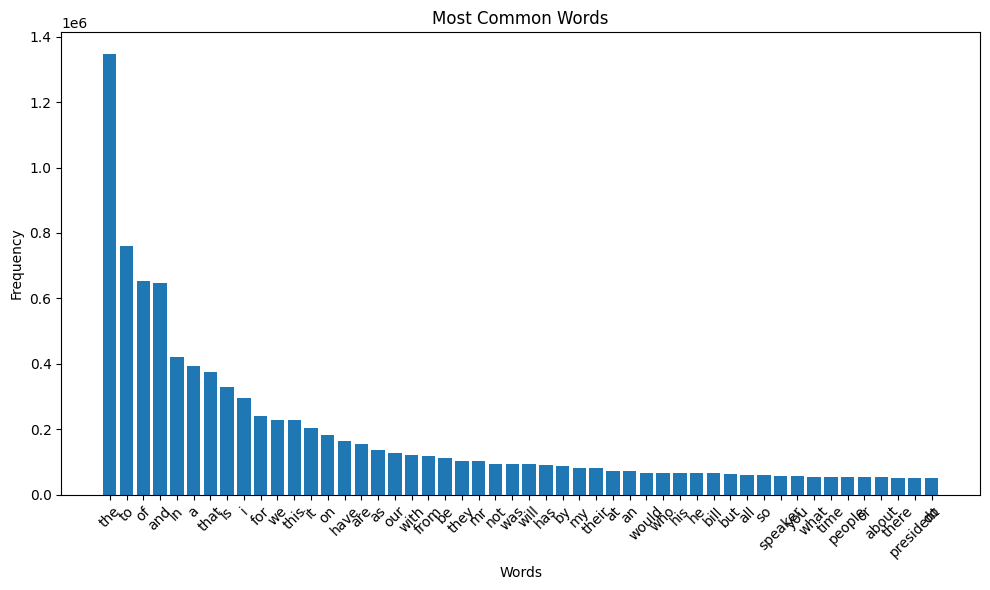

In [2]:
from collections import Counter
import re

def count_words_incrementally(file_path):
    word_counts = Counter()
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        for line in file:
            # Process each line to extract words
            words = re.findall(r'\b\w+\b', line.lower())
            word_counts.update(words)  # Update counts with words from the line
    return word_counts

def plot_word_frequencies(word_counts, top_n=50):
    import matplotlib.pyplot as plt
    # Get the most common words
    most_common = word_counts.most_common(top_n)
    words, counts = zip(*most_common)
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Most Common Words')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main function
def main():
    file_path = "C:/Users/hanst/Downloads/speeches_114.txt"
    word_counts = count_words_incrementally(file_path)
    plot_word_frequencies(word_counts)

if __name__ == "__main__":
    main()

In [3]:
def get_speaker_party(file_path, speech_id):
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            # Skip empty lines

            if not line.strip():
                continue
            # Split the line by the delimiter '|'
            
            fields = line.strip().split('|')
            if len(fields) > 7:  # Ensure there are enough fields in the line
                current_speech_id = fields[1]  # Speech ID is the 2nd field (index 1)
                if current_speech_id == speech_id:
                    return fields[7]  # Return the party (8th field, index 7)
    return None  # Return None if the speech ID is not found


print(get_speaker_party("C:/Users/hanst/Downloads/114_SpeakerMap.txt", "1140000019"))

D


In [9]:
from tqdm import tqdm
from collections import Counter
import re

# Function to get the party of a speaker given a speech ID
def get_speaker_party(file_path, speech_id):
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            if not line.strip():
                continue
            fields = line.strip().split('|')
            if len(fields) > 7 and fields[1] == speech_id:  # Speech ID is in the second field
                return fields[7]  # Party is the eighth field
    return None

#Better dictionary format
def load_speaker_map(file_path):
    speaker_map = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            if not line.strip():
                continue
            fields = line.strip().split('|')
            if len(fields) > 7:  # Ensure fields[1] (speech_id) and fields[7] (party) exist
                speaker_map[fields[1]] = fields[7]
    return speaker_map

# Function to count words in speeches by party
def count_words_by_party(speakermap_path, speech_path):
    party_word_counts = {"D": Counter(), "R": Counter()}  # Counters for Democrats and Republicans

    with open(speech_path, 'r', encoding='utf-8', errors='ignore') as speech_file:
        for line in speech_file:
            if not line.strip():
                continue
            fields = line.strip().split('|')
            if len(fields) > 1:  # Ensure there's a speech ID and text
                speech_id = fields[0]
                speech_text = fields[1].lower()

                # Get the speaker's party using the speech ID
                party = get_speaker_party(speakermap_path, speech_id)
                if party in party_word_counts:  # Only consider D or R parties
                    # Tokenize the speech text into words and update the counter
                    if (int(speech_id) % 1000 == 0):
                        print("bruv")
                    words = re.findall(r'\b\w+\b', speech_text)
                    party_word_counts[party].update(words)

    return party_word_counts

# Function to get the top N most common words
def get_top_words(word_counts, top_n=100):
    return word_counts.most_common(top_n)

# Main function
def main():
    speakermap_path = "C:/Users/hanst/Downloads/114_SpeakerMap.txt"  # Replace with your actual file path
    speech_path = "C:/Users/hanst/Downloads/speeches_114.txt"  # Replace with your actual file path

    speaker_dict = load_speaker_map(speakermap_path)

    # Count words by party
    party_word_counts = count_words_by_party(speakermap_path, speech_path)

    # Get the top 100 words for Democrats and Republicans
    top_democrat_words = get_top_words(party_word_counts["D"], top_n=100)
    top_republican_words = get_top_words(party_word_counts["R"], top_n=100)

    # Display the results
    print("Top 100 Words for Democrats:")
    for word, count in top_democrat_words:
        print(f"{word}: {count}")

    print("\nTop 100 Words for Republicans:")
    for word, count in top_republican_words:
        print(f"{word}: {count}")

if __name__ == "__main__":
    main()

bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
bruv
Top 100 Words for Democrats:
the: 496399
to: 303042
of: 243473
and: 242747
that: 164764
in: 160229
a: 157377
is: 131526
i: 122910
we: 108073
this: 96512
for: 91461
it: 85585
have: 72216
are: 70387
on: 69465
our: 54770
as: 48576
with: 47412
they: 45307
be: 43980
from: 42552
not: 41843
my: 35828
will: 34540
mr: 34080
was: 33428
by: 32975
has: 32821
their: 30467
would: 29946
but: 28514
an: 28061
bill: 27812
who: 27789
at: 26254
you: 25536
all: 24378
about: 24244
so: 24072
do: 23990
what: 23931
or: 23158
people: 23101
there: 21914
time: 21426
these: 21013
he: 20494
more: 20467
can: 19934
speaker: 18684
been: 18436
if: 17880
president: 17013
one: 16827

In [ ]:
from tqdm import tqdm
from collections import Counter
import re

# Function to get the party of a speaker given a speech ID
def get_speaker_party(speaker_map, speech_id):
    return speaker_map.get(speech_id)

#Better dictionary format
def load_speaker_map(file_path):
    speaker_map = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            if not line.strip():
                continue
            fields = line.strip().split('|')
            if len(fields) > 7:  # Ensure fields[1] (speech_id) and fields[7] (party) exist
                speaker_map[fields[1]] = fields[7]
    return speaker_map

# Function to count words in speeches by party
def count_words_by_party(speaker_map, speech_path):
    party_word_counts = {"D": Counter(), "R": Counter()}  # Counters for Democrats and Republicans

    with open(speech_path, 'r', encoding='utf-8', errors='ignore') as speech_file:
        for line in speech_file:
            if not line.strip():
                continue
            fields = line.strip().split('|')
            if len(fields) > 1:  # Ensure there's a speech ID and text
                speech_id = fields[0]
                speech_text = fields[1].lower()

                # Get the speaker's party using the speech ID
                party = get_speaker_party(speaker_map, speech_id)
                if party in party_word_counts:  # Only consider D or R parties
                    # Tokenize the speech text into words and update the counter
                    if (int(speech_id) % 10000 == 0):
                    words = re.findall(r'\b\w+\b', speech_text)
                    party_word_counts[party].update(words)

    return party_word_counts

# Function to get the top N most common words
def get_top_words(word_counts, top_n=100):
    return word_counts.most_common(top_n)



# Main function
def main():
    speakermap_path = "C:/Users/hanst/Downloads/114_SpeakerMap.txt"  # Replace with your actual file path
    speech_path = "C:/Users/hanst/Downloads/speeches_114.txt"  # Replace with your actual file path

    speaker_dict = load_speaker_map(speakermap_path)

    # Count words by party
    party_word_counts = count_words_by_party(speaker_dict, speech_path)

    # Get the top 100 words for Democrats and Republicans
    top_democrat_words = get_top_words(party_word_counts["D"], top_n=100)
    top_republican_words = get_top_words(party_word_counts["R"], top_n=100)

    # Display the results
    print("Top 100 Words for Democrats:")
    for word, count in top_democrat_words:
        print(f"{word}: {count}")

    print("\nTop 100 Words for Republicans:")
    for word, count in top_republican_words:
        print(f"{word}: {count}")

if __name__ == "__main__":
    main()

bruv
bruv
bruv
bruv
bruv
bruv
Top 100 Words for Democrats:
the: 496399
to: 303042
of: 243473
and: 242747
that: 164764
in: 160229
a: 157377
is: 131526
i: 122910
we: 108073
this: 96512
for: 91461
it: 85585
have: 72216
are: 70387
on: 69465
our: 54770
as: 48576
with: 47412
they: 45307
be: 43980
from: 42552
not: 41843
my: 35828
will: 34540
mr: 34080
was: 33428
by: 32975
has: 32821
their: 30467
would: 29946
but: 28514
an: 28061
bill: 27812
who: 27789
at: 26254
you: 25536
all: 24378
about: 24244
so: 24072
do: 23990
what: 23931
or: 23158
people: 23101
there: 21914
time: 21426
these: 21013
he: 20494
more: 20467
can: 19934
speaker: 18684
been: 18436
if: 17880
president: 17013
one: 16827
when: 16571
no: 16167
his: 16163
which: 15571
us: 15559
amendment: 15441
because: 15021
just: 14822
those: 14379
states: 14295
act: 14059
years: 14049
were: 13910
american: 13494
country: 13259
other: 13185
want: 13061
work: 13027
them: 13003
now: 12864
than: 12802
up: 12798
out: 12731
make: 12678
many: 12641
sup

In [ ]:
def get



def main():




if __name__ == "__main__":
    main()



67972


In [ ]:
from tqdm import tqdm
from collections import Counter
import re

# Function to get the party of a speaker given a speech ID
def get_speaker_party(file_path, speech_id):
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            if not line.strip():
                continue
            fields = line.strip().split('|')
            if len(fields) > 7 and fields[1] == speech_id:  # Speech ID is in the second field
                return fields[7]  # Party is the eighth field
    return None

# Function to count words in speeches by party
def count_words_by_party(speakermap_path, speech_path):
    party_word_counts = {"D": Counter(), "R": Counter()}  # Counters for Democrats and Republicans

    with open(speech_path, 'r', encoding='utf-8', errors='ignore') as speech_file:
        for line in speech_file:
            if not line.strip():
                continue
            fields = line.strip().split('|')
            if len(fields) > 1:  # Ensure there's a speech ID and text
                speech_id = fields[0]
                speech_text = fields[1].lower()

                # Get the speaker's party using the speech ID
                party = get_speaker_party(speakermap_path, speech_id)
                if party in party_word_counts:  # Only consider D or R parties
                    # Tokenize the speech text into words and update the counter
                    words = re.findall(r'\b\w+\b', speech_text)
                    party_word_counts[party].update(words)

    return party_word_counts

# Function to get the top N most common words
def get_top_words(word_counts, top_n=100):
    return word_counts.most_common(top_n)



speakermap_path = "C:/Users/hanst/Downloads/114_SpeakerMap.txt"  # Replace with your actual file path
speech_path = "C:/Users/hanst/Downloads/speeches_114.txt"  # Replace with your actual file path

# Count words by party
party_word_counts = count_words_by_party(speakermap_path, speech_path)

# Get the top 100 words for Democrats and Republicans
top_democrat_words = get_top_words(party_word_counts["D"], top_n=100)
top_republican_words = get_top_words(party_word_counts["R"], top_n=100)

# Display the results
print("Top 100 Words for Democrats:")
for word, count in top_democrat_words:
    print(f"{word}: {count}")

print("\nTop 100 Words for Republicans:")
for word, count in top_republican_words:
    print(f"{word}: {count}")

In [ ]:
from tqdm import tqdm
speech_path = "C:/Users/hanst/Downloads/speeches_114.txt"
speakermap_path = "C:/Users/hanst/Downloads/114_SpeakerMap.txt"

party_word_counts = {"D": Counter(), "R": Counter()}  # Counters for Democrats and Republicans

with open(speech_path, 'r', encoding='utf-8', errors='ignore') as speech_file:
    for line in tqdm(speech_file):
        if not line.strip():
            continue
        fields = line.strip().split('|')
        if len(fields) > 1:  # Ensure there's a speech ID and text
            speech_id = fields[0]
            speech_text = fields[1].lower()

            # Get the speaker's party using the speech ID
            party = get_speaker_party(speakermap_path, speech_id)
            if party in party_word_counts:  # Only consider D or R parties
                # Tokenize the speech text into words and update the counter
                words = re.findall(r'\b\w+\b', speech_text)
                party_word_counts[party].update(words)

print(party_word_counts)